# convert aicha results(.txt) into json

In [ ]:
[
    {
        "image_id": "a0f6bdc065a602b7b84a67fb8d14ce403d902e0d",
        "keypoint_annotations": {
        "human1": [261, 294, 1, 281, 328, 1, 0, 0, 0, 213, 295, 1, 208, 346, 1, 192, 335, 1, 245, 375, 1, 255, 432, 1, 244, 494, 1, 221, 379, 1, 219, 442, 1, 226, 491, 1, 226, 256, 1, 231, 284, 1],
        "human2": [313, 301, 1, 305, 337, 1, 321, 345, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 313, 359, 1, 320, 409, 1, 311, 454, 1, 0, 0, 0, 330, 409, 1, 324, 446, 1, 337, 284, 1, 327, 302, 1],
        "human3": [373, 304, 1, 346, 286, 1, 332, 263, 1, 0, 0, 0, 0, 0, 0, 345, 313, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 363, 386, 1, 361, 424, 1, 361, 475, 1, 365, 273, 1, 369, 297, 1],
        ...
        }
    }
    ...
]

In [68]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat
from numpy.core.records import fromarrays
from PIL import Image
from itertools import compress
import os, pprint
import json
from tqdm import tqdm_notebook


aicha_pred_dir = '/home/yuliang/code/multi-human-pose/predict/NMS'
aicha_gt = os.path.join(aicha_pred_dir, 'keypoint_validation_annotations_20170911.json')
aicha_pred = os.path.join(aicha_pred_dir, 'submit.json')
image_dir = '/home/yuliang/code/multi-human-pose/predict/data/images'
# index = np.loadtxt('index.txt', delimiter=' ', dtype='S50,i4,i4')
# pose_score = np.loadtxt('scores.txt', dtype='S50'+14*',d')
# pose = np.loadtxt('pred.txt', dtype='S50'+28*',i4')

with open(aicha_gt, 'r') as f:
    gt = json.load(f)

with open(aicha_pred, 'r') as f:
    pred = json.load(f)

colors = ['r', 'k', 'b', 'r', 'k', 'b', 'm', 'y', 'c', 'm', 'y', 'c', 'g', 'w']

# aicha_results = []

vis = False


# for idx, item in enumerate(tqdm_notebook(index)):
for idx, item in enumerate(tqdm_notebook(len(aicha_gt))):
    
    image_id = item[0][:-4]
    human_num = item[2]-item[1]+1
    image_result = {}
    image_result['image_id'] = image_id
    image_result['keypoint_annotations'] = {}
    
    for human_id in xrange(1, human_num+1):
        image_result['keypoint_annotations']['human'+str(human_id)] = np.hstack((np.array([p for p in pose[item[1]+human_id-2] if type(p) is np.int32])\
                                                                                 .reshape(-1,2),np.ones((14,1)))).flatten().tolist()
    aicha_results.append(image_result)
    
    if vis:
        # prediction          
        plt.figure(figsize=(20,10))
        plt.subplot(1,2,1)
        ax = plt.gca()
        plt.imshow(Image.open(os.path.join(image_dir, item[0])))
        for i in xrange(human_num):
            pose_ = np.array([p for p in pose[item[1]-1+i] if type(p) is np.int32]).reshape(-1,2)
            plt.plot(pose_[:,0], pose_[:,1], maker='o',color=colors)
            pose_score_ = np.array([p for p in pose_score[idx+i] if type(p) is np.float64]).reshape(-1,1)
            xmin = np.min(pose_[:,0])
            ymin = np.min(pose_[:,1])
            xmax = np.max(pose_[:,0])
            ymax = np.max(pose_[:,1])
            display_txt = '%.2f'%(np.mean(pose_score_))
            coords = (xmin, ymin), xmax-xmin+1, ymax-ymin+1
            ax.add_patch(plt.Rectangle(*coords, fill=False, edgecolor='yellow', linewidth=2))
            ax.add_patch(plt.Rectangle(*coords, fill=False, edgecolor='yellow', linewidth=2))
            ax.text(xmin, ymin, display_txt, bbox={'facecolor':'red', 'alpha':0.5})
        
        # groundtruth
        plt.subplot(1,2,2)
        ax = plt.gca()
        for idx_gt in xrange(len(gt)):
            if gt[idx_gt]['image_id'] == image_id:
                human_num_ = len(gt[idx_gt]['keypoint_annotations'].keys())
                plt.imshow(Image.open(os.path.join(image_dir, item[0])))
                for i in xrange(1,human_num_+1):
                    pose_ = np.array(gt[idx_gt]['keypoint_annotations']['human'+str(i)]).reshape(-1,3)
                    xmin = np.min(pose_[:,0])
                    ymin = np.min(pose_[:,1])
                    xmax = np.max(pose_[:,0])
                    ymax = np.max(pose_[:,1])
                    coords = (xmin, ymin), xmax-xmin+1, ymax-ymin+1
                    ax.add_patch(plt.Rectangle(*coords, fill=False, edgecolor='yellow', linewidth=2))
    
    if idx == 5:
        break

# final = json.dumps(aicha_results)
# with open('submit.json','w') as f:
#     f.write(final)
    

        

In [69]:
aicha_gt = os.path.join(aicha_pred_dir, 'keypoint_validation_annotations_20170911.json')

with open(aicha_gt, 'r') as f:
    gt = json.load(f)

In [77]:
box = 0
for idx in xrange(len(gt)):
    box += len(gt[idx]['keypoint_annotations'].keys())
print 'average number of boxes is : ', box*1.0/len(gt)

average number of boxes is :  2.34673333333


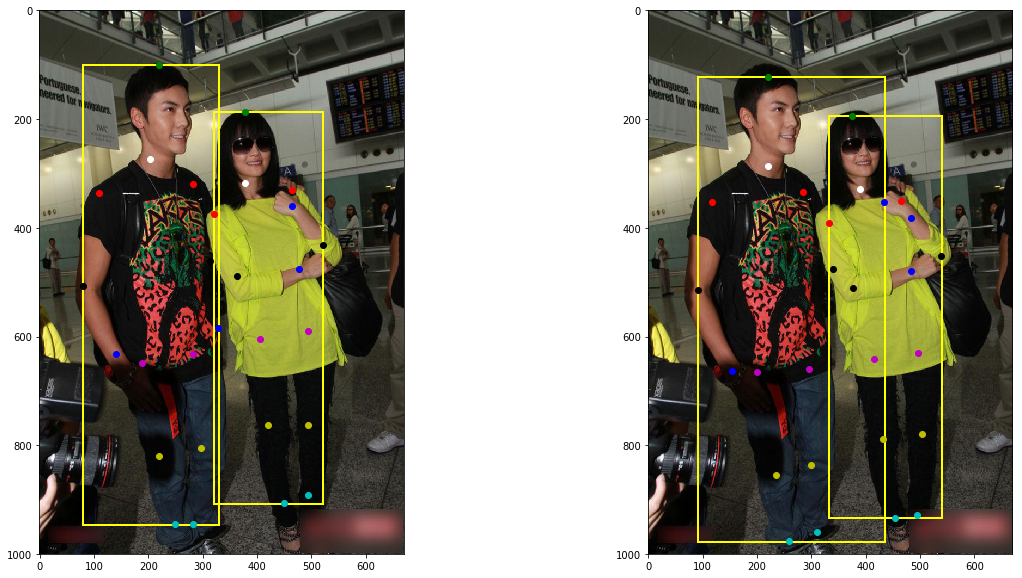

In [109]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat
from numpy.core.records import fromarrays
from PIL import Image
from itertools import compress
import os, pprint
import json
from tqdm import tqdm_notebook


aicha_pred_dir = '/home/yuliang/code/multi-human-pose/predict/NMS'
aicha_gt = os.path.join(aicha_pred_dir, 'keypoint_validation_annotations_20170911.json')
aicha_pred = os.path.join(aicha_pred_dir,'aicha-0.6', 'submit.json')
image_dir = '/home/yuliang/code/multi-human-pose/predict/data/images'

with open(aicha_gt, 'r') as f:
    gt = json.load(f)

with open(aicha_pred, 'r') as f:
    pred = json.load(f)

colors = ['r', 'k', 'b', 'r', 'k', 'b', 'm', 'y', 'c', 'm', 'y', 'c', 'g', 'w']

plt.figure(figsize=(20,10))
image_id = pred[0]['image_id']

# prediction          
plt.subplot(1,2,1)
ax = plt.gca()
for idx_pred in xrange(len(pred)):
    if image_id == pred[idx_pred]['image_id']:
        human_num_ = len(pred[idx_pred]['keypoint_annotations'].keys())
        plt.imshow(Image.open(os.path.join(image_dir, image_id+'.jpg')))
        for i in xrange(1,human_num_+1):
            pose_ = np.array(pred[idx_pred]['keypoint_annotations']['human'+str(i)]).reshape(-1,3)
            for idx_c, color in enumerate(colors):
                plt.plot(pose_[idx_c,0], pose_[idx_c,1], marker='o', color=color)
            xmin = np.min(pose_[:,0])
            ymin = np.min(pose_[:,1])
            xmax = np.max(pose_[:,0])
            ymax = np.max(pose_[:,1])
            coords = (xmin, ymin), xmax-xmin+1, ymax-ymin+1
            ax.add_patch(plt.Rectangle(*coords, fill=False, edgecolor='yellow', linewidth=2))

# groundtruth
plt.subplot(1,2,2)
ax = plt.gca()
for idx_gt in xrange(len(gt)):
    if image_id == gt[idx_gt]['image_id']:
        human_num_ = len(gt[idx_gt]['keypoint_annotations'].keys())
        plt.imshow(Image.open(os.path.join(image_dir, image_id+'.jpg')))
        for i in xrange(1,human_num_+1):
            pose_ = np.array(gt[idx_gt]['keypoint_annotations']['human'+str(i)]).reshape(-1,3)
            for idx_c, color in enumerate(colors):
                plt.plot(pose_[idx_c,0], pose_[idx_c,1], marker='o', color=color)
            xmin = np.min(pose_[:,0])
            ymin = np.min(pose_[:,1])
            xmax = np.max(pose_[:,0])
            ymax = np.max(pose_[:,1])
            coords = (xmin, ymin), xmax-xmin+1, ymax-ymin+1
            ax.add_patch(plt.Rectangle(*coords, fill=False, edgecolor='yellow', linewidth=2))
